In [1]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import pingouin as pg
from statsmodels.formula.api import ols
import matplotlib.pyplot as pit
import statsmodels
from statsmodels.tsa.stattools import coint
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import scipy.stats as ss
import seaborn as sns
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

C:\Users\user\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
stock_dict ={
    '세명전기':'017510',
    '코마스인':'045390',
    '미주레일':'078940',
    '케이아이씨':'007460'}

stock_dict

{'세명전기': '017510', '코마스인': '045390', '미주레일': '078940', '케이아이씨': '007460'}

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


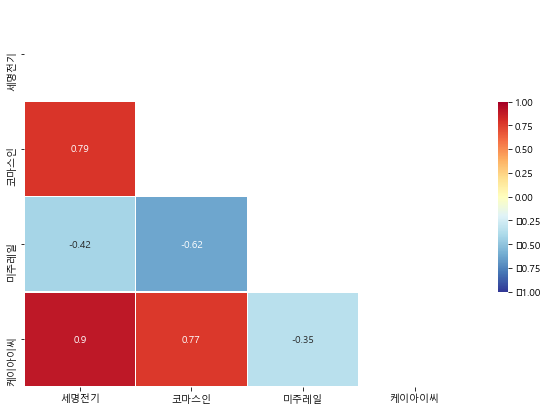

In [4]:
# 선거 이전:  "2006-08-20", "2007-04-22"

list_01 = []
for item_code in stock_dict.values():
    close_1 = fdr.DataReader(item_code, "2006-08-20", "2007-04-22")['Close']
    list_01 .append(close_1)

df_0607 = pd.concat(list_01, axis=1)
df_0607.columns = stock_dict.keys()
df_0607.reset_index(inplace=True)

df_0607['Date'] = pd.to_datetime(df_0607['Date'])
df_0607.set_index('Date', inplace=True)
#df_0607= df_0607*100

corr0607 = df_0607.corr()

#사이즈 
fig, ax = plt.subplots( figsize=(10,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr0607, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(corr0607, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

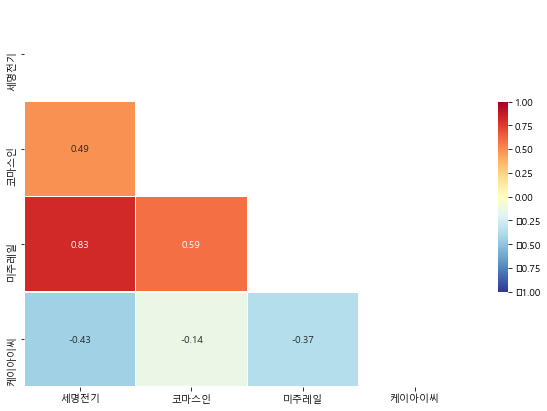

In [7]:
# 선거 기간~당선 (2007-04-23 ~ 2007-12-20)

list_02 = []
for item_code in stock_dict.values():
    close_02 = fdr.DataReader(item_code, "2007-04-23", "2007-12-20")['Close']
    list_02 .append(close_02)

df_02 = pd.concat(list_02, axis=1)
df_02.columns = stock_dict.keys()
df_02.reset_index(inplace=True)

df_02['Date'] = pd.to_datetime(df_02['Date'])
df_02.set_index('Date', inplace=True)

df_02corr = df_02.corr()

#사이즈 
fig, ax = plt.subplots( figsize = (10,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df_02corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(df_02corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

<AxesSubplot:>

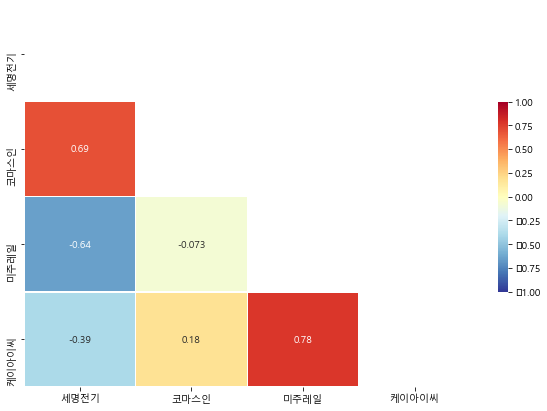

In [15]:
# 당선이후 재임시절까지 (2007-12-21 ~ 2013-2-23)

list_03 = []
for item_code in stock_dict.values():
    close_03 = fdr.DataReader(item_code, "2007-12-21", "2013-02-23")['Close']
    list_03.append(close_03)

dy_03 = pd.concat(list_03, axis=1)
dy_03 .columns = stock_dict.keys()
dy_03 .reset_index(inplace=True)

dy_03 ['Date'] = pd.to_datetime(dy_03 ['Date'])
dy_03.set_index('Date', inplace=True)

dy_03corr = dy_03 .corr()

#사이즈 
fig, ax = plt.subplots( figsize=(10,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(dy_03corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(dy_03corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  